# **Loading the data**

In [140]:
#importing the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
#setting warnings to ignore
import warnings
warnings.filterwarnings('ignore')

Only data on net imports is available in the dataset. Ideally, net consumption should be derived by summing imports and production. Since no data could be obtained for monthly production after exploring other sources, net imports is used.



In [141]:
#loading the file into a pandas dataframe 
df = pd.read_csv('assignment_flows.csv')
df

,type,commodity,commodity_origin_iso2,commodity_origin_country,commodity_destination_iso2,commodity_destination_country,date,value_m3
0,crossborder,natural_gas,IT,Italy,AT,Austria,2023-01-01,1.205751e+07
1,crossborder,natural_gas,SK,Slovakia,AT,Austria,2023-01-01,2.457134e+07
2,crossborder,natural_gas,CH,Switzerland,BG,Bulgaria,2023-01-01,3.784466e+06
3,crossborder,natural_gas,DE,Germany,CZ,Czech Republic,2023-01-01,3.213608e+07
4,crossborder,natural_gas,AZ,Azerbaijan,GR,Greece,2023-01-01,3.313508e+07
...,...,...,...,...,...,...,...,...
10332,crossborder,natural_gas,NO,Norway,GB,United Kingdom,2023-05-01,9.153227e+07
10333,production,natural_gas,GB,United Kingdom,GB,United Kingdom,2023-05-01,5.267698e+07
10334,crossborder,natural_gas,lng,LNG,GB,United Kingdom,2023-05-01,7.602247e+07
10335,production,natural_gas,HR,Croatia,HR,Croatia,2023-05-01,1.497817e+06


# **Data Exploration and Pre-processing**

In [142]:
#checking the format of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   type                           10337 non-null  object 
 1   commodity                      10337 non-null  object 
 2   commodity_origin_iso2          10337 non-null  object 
 3   commodity_origin_country       10337 non-null  object 
 4   commodity_destination_iso2     10337 non-null  object 
 5   commodity_destination_country  10337 non-null  object 
 6   date                           10337 non-null  object 
 7   value_m3                       10337 non-null  float64
dtypes: float64(1), object(7)
memory usage: 646.2+ KB


In [143]:
#checking for duplicate rows 
df.duplicated().sum()

0

In [144]:
#converting date column to datetime format

df['date'] = pd.to_datetime(df['date'])

#defining a function that extracts the month and year 

def format_month_year(df, column):
    # Extract the month and year from the datetime column
    df['month_year'] = df[column].dt.strftime('%B %Y')
    
    return df['month_year']

# applying the function on date
df['month_year'] = format_month_year(df, 'date')

# viewing the updated dataframe
df

,type,commodity,commodity_origin_iso2,commodity_origin_country,commodity_destination_iso2,commodity_destination_country,date,value_m3,month_year
0,crossborder,natural_gas,IT,Italy,AT,Austria,2023-01-01,1.205751e+07,January 2023
1,crossborder,natural_gas,SK,Slovakia,AT,Austria,2023-01-01,2.457134e+07,January 2023
2,crossborder,natural_gas,CH,Switzerland,BG,Bulgaria,2023-01-01,3.784466e+06,January 2023
3,crossborder,natural_gas,DE,Germany,CZ,Czech Republic,2023-01-01,3.213608e+07,January 2023
4,crossborder,natural_gas,AZ,Azerbaijan,GR,Greece,2023-01-01,3.313508e+07,January 2023
...,...,...,...,...,...,...,...,...,...
10332,crossborder,natural_gas,NO,Norway,GB,United Kingdom,2023-05-01,9.153227e+07,May 2023
10333,production,natural_gas,GB,United Kingdom,GB,United Kingdom,2023-05-01,5.267698e+07,May 2023
10334,crossborder,natural_gas,lng,LNG,GB,United Kingdom,2023-05-01,7.602247e+07,May 2023
10335,production,natural_gas,HR,Croatia,HR,Croatia,2023-05-01,1.497817e+06,May 2023


In [145]:
#checking the countries and the number of times they received gas shipments 
df['commodity_destination_country'].value_counts()

Italy             786
Germany           715
Hungary           690
Netherlands       661
Poland            648
Belgium           588
United Kingdom    551
Spain             513
Ukraine           461
France            428
Bulgaria          367
Croatia           358
Switzerland       352
Slovakia          298
Austria           280
Romania           252
Lithuania         248
Slovenia          244
Portugal          205
Serbia            190
Moldova           173
Greece            164
Finland           152
Luxembourg        121
Russia            121
Czech Republic    121
Morocco           120
Latvia            120
Ireland           117
San Marino        117
Macedonia         114
Denmark            33
Estonia            29
Name: commodity_destination_country, dtype: int64

In [146]:
#calculating the total gas received by each country
quantitybycountry = df.groupby('commodity_destination_country').sum()['value_m3']
quantitybycountry

commodity_destination_country
Austria           4.665226e+09
Belgium           1.879411e+10
Bulgaria          4.721921e+09
Croatia           1.126799e+09
Czech Republic    2.418467e+09
Denmark           3.579184e+07
Estonia           7.720060e+07
Finland           3.050446e+08
France            1.614675e+10
Germany           3.601707e+10
Greece            3.882456e+09
Hungary           2.955194e+09
Ireland           1.933525e+09
Italy             2.118326e+10
Latvia            4.747795e+08
Lithuania         1.991833e+09
Luxembourg        2.636563e+08
Macedonia         1.322597e+08
Moldova           9.584449e+08
Morocco           2.628599e+08
Netherlands       2.047582e+10
Poland            5.321363e+09
Portugal          1.593882e+09
Romania           3.430161e+09
Russia            8.629152e+08
San Marino        2.035645e+07
Serbia            2.504738e+09
Slovakia          4.402266e+09
Slovenia          4.049000e+08
Spain             1.063127e+10
Switzerland       3.615251e+09
Ukraine  

In [147]:
#checking the time range of data available
df['month_year'].value_counts()

January 2023     2709
March 2023       2598
April 2023       2484
February 2023    2464
May 2023           82
Name: month_year, dtype: int64

In [ ]:
#checking for outliers in the gas consumption

In [148]:
# Group the data by destination country and month and calculating the sum of monthly gas consumption
grouped_data = df.groupby(['commodity_destination_country', 'month_year']).sum()['value_m3']
grouped_data = grouped_data.to_frame()
grouped_data = grouped_data.reset_index()

# **Obtaining the monthly gas consumption for each country**

In [149]:
# Sort the dataframes using a custom order
custom_order = ['January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023']

#applying the custom order to the dataframe
grouped_data['month_year'] = pd.Categorical(grouped_data['month_year'], categories=custom_order, ordered=True)
grouped_data = grouped_data.sort_values('month_year')

#sorting by country and date to obtain the monthly gas consumption of each country
grouped_data['Row Num'] = grouped_data.groupby(['commodity_destination_country'])['month_year'].rank(method='first') 
grouped_data.sort_values(by= ['commodity_destination_country','month_year'], inplace = True)
grouped_data = grouped_data.drop('Row Num', axis=1)
grouped_data


,commodity_destination_country,month_year,value_m3
2,Austria,January 2023,1.253390e+09
1,Austria,February 2023,1.015971e+09
3,Austria,March 2023,1.073809e+09
0,Austria,April 2023,1.272861e+09
4,Austria,May 2023,4.919494e+07
...,...,...,...
156,United Kingdom,January 2023,8.329319e+09
155,United Kingdom,February 2023,7.457346e+09
157,United Kingdom,March 2023,8.272564e+09
154,United Kingdom,April 2023,7.294177e+09


# **Visualising the monthly gas consumption for each country**

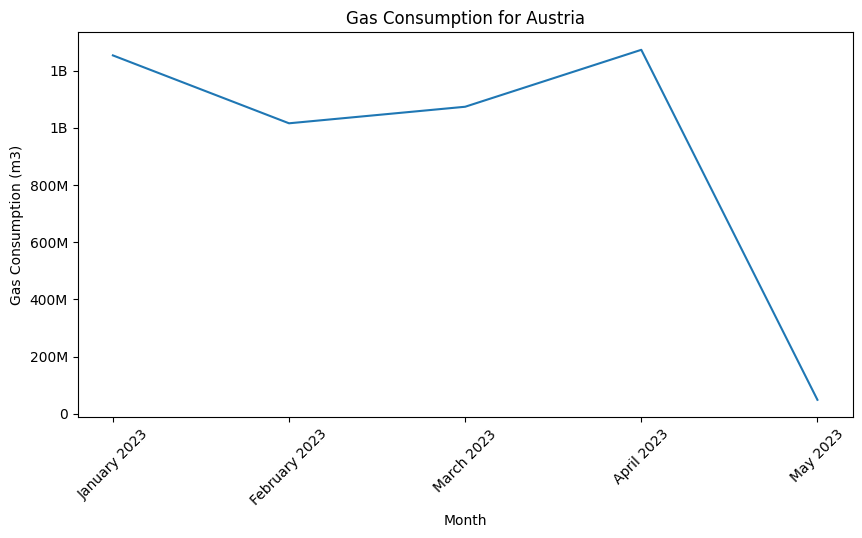

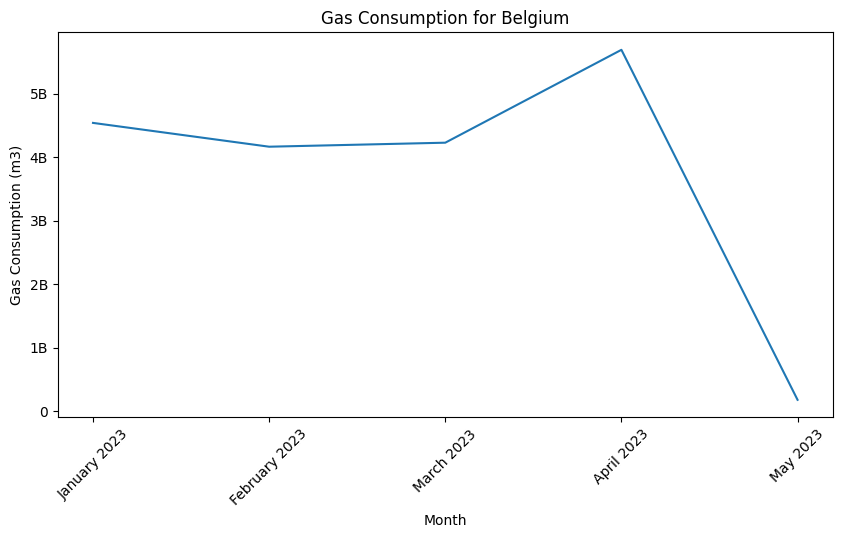

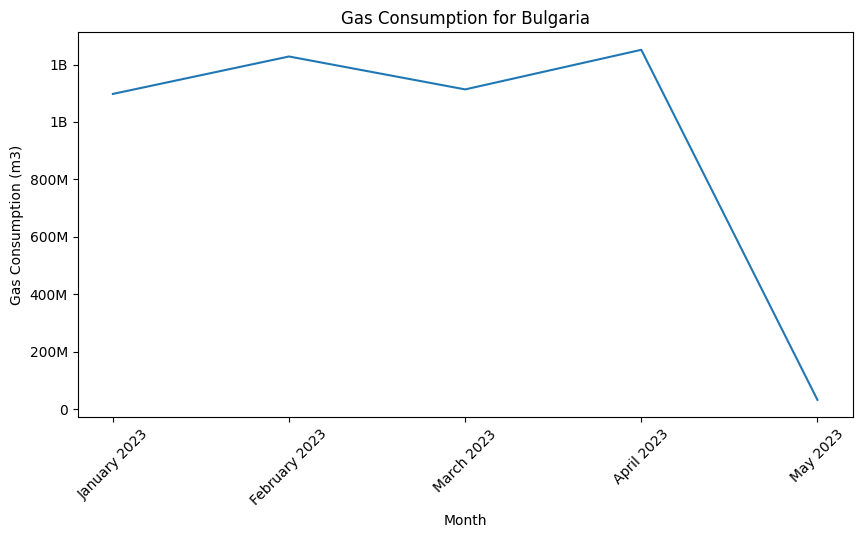

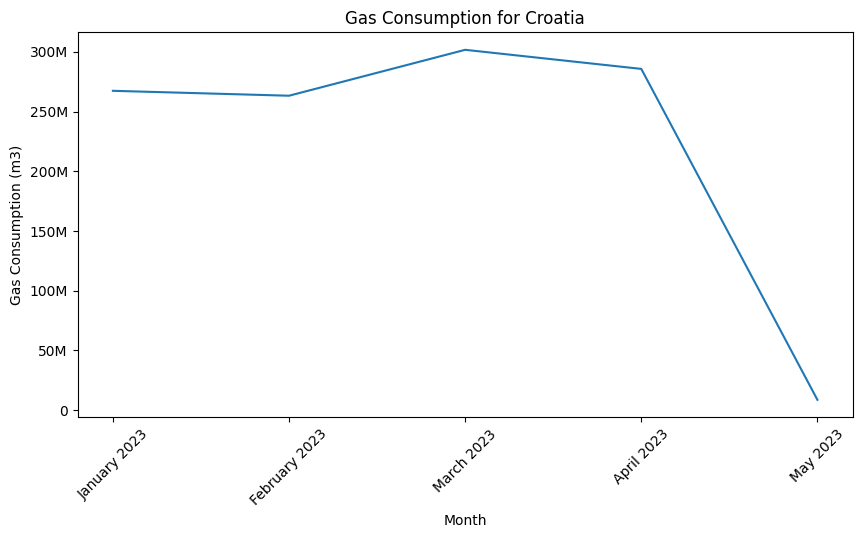

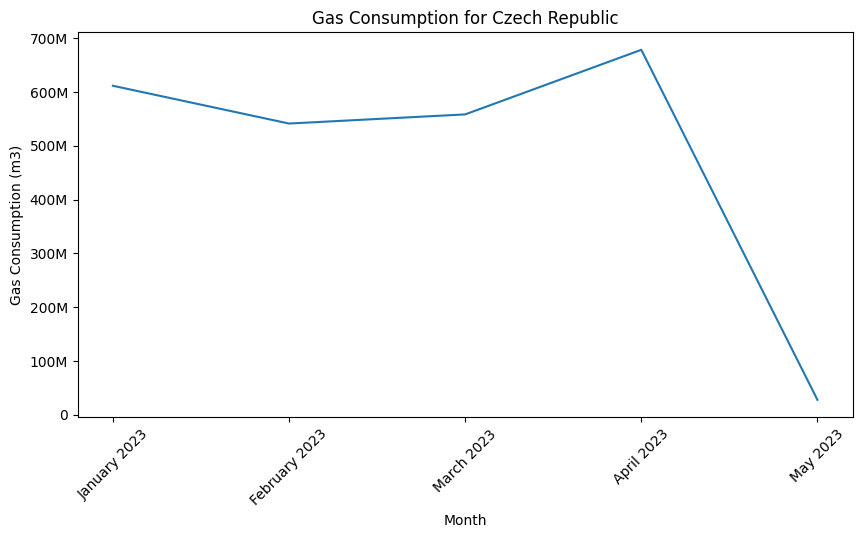

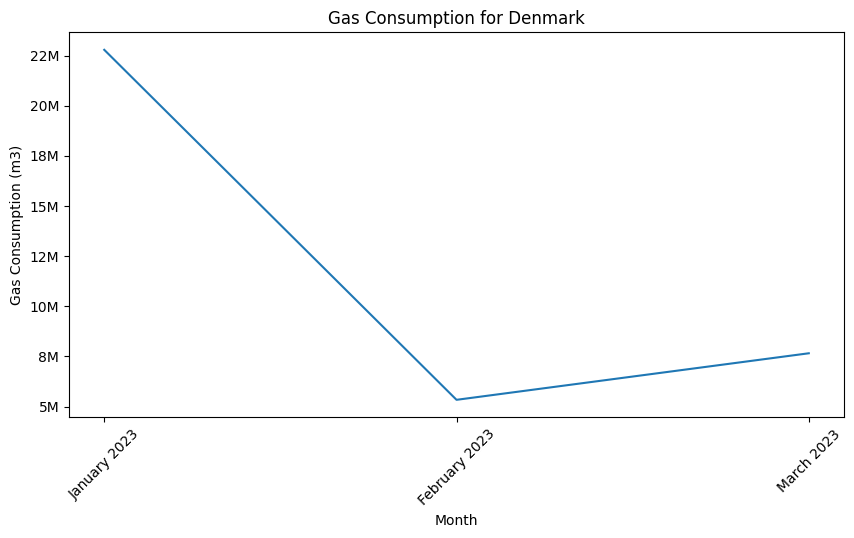

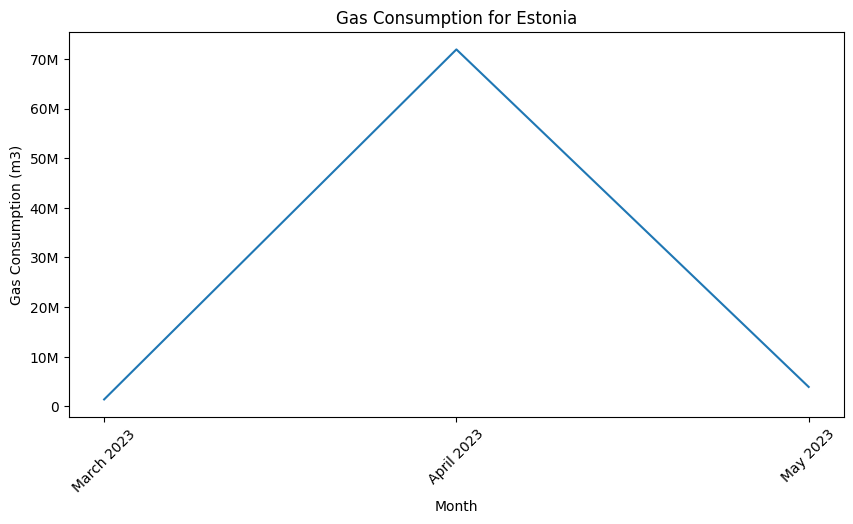

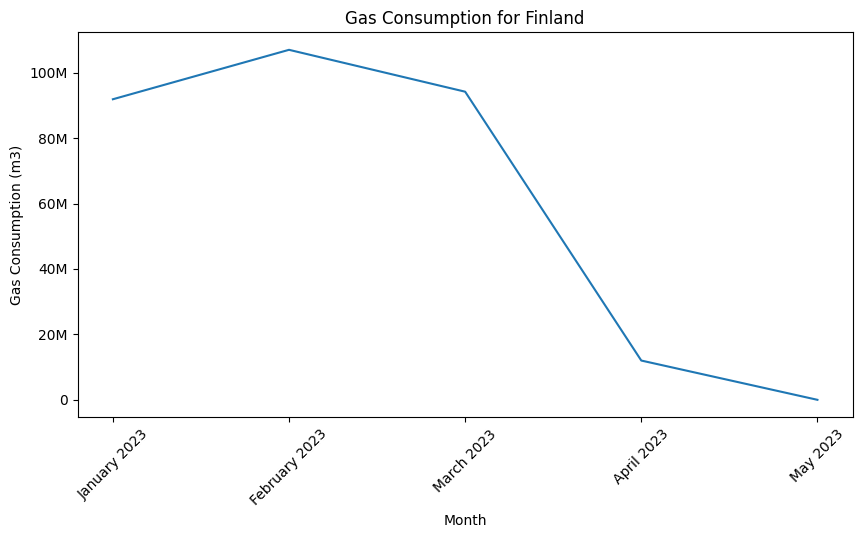

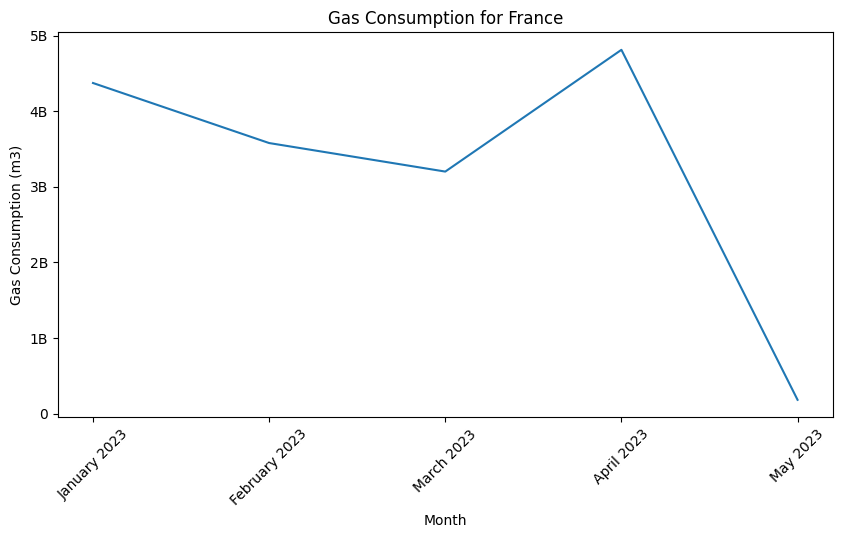

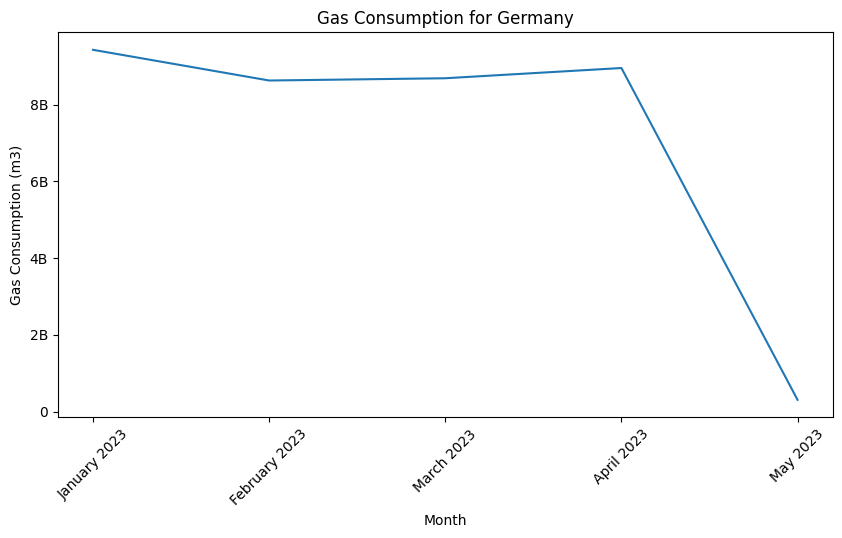

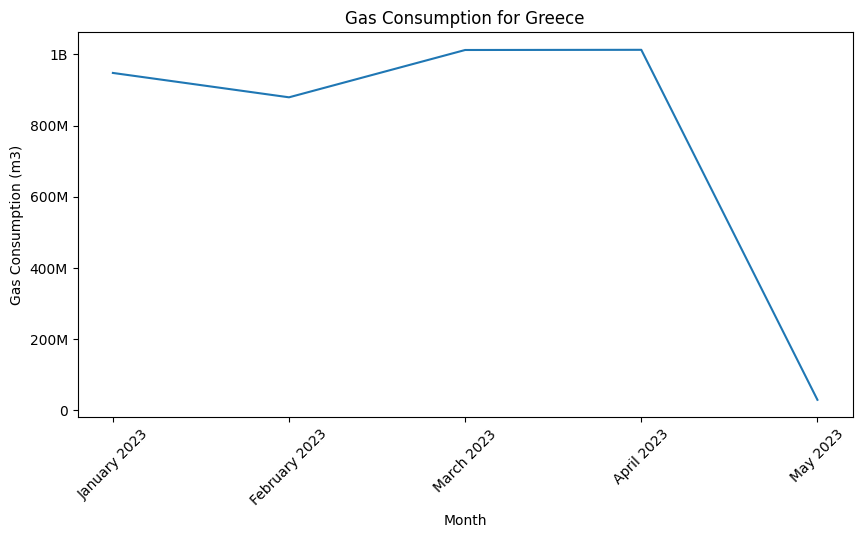

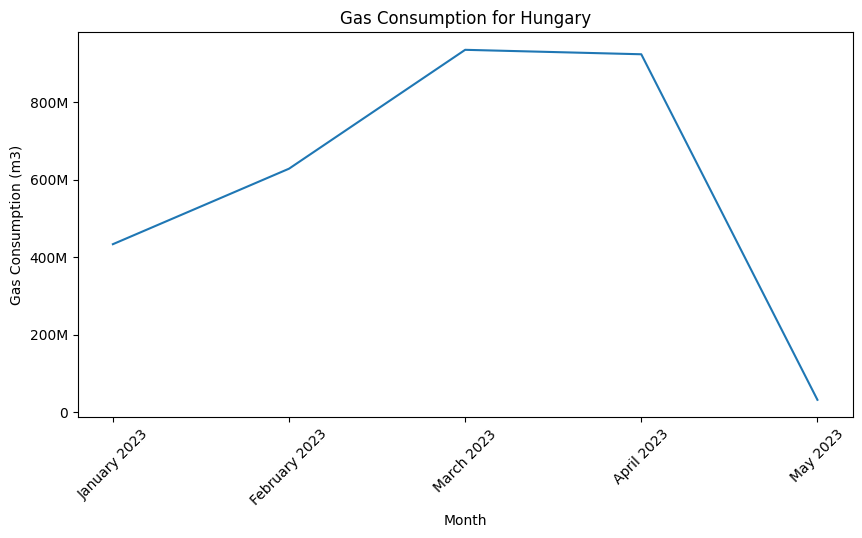

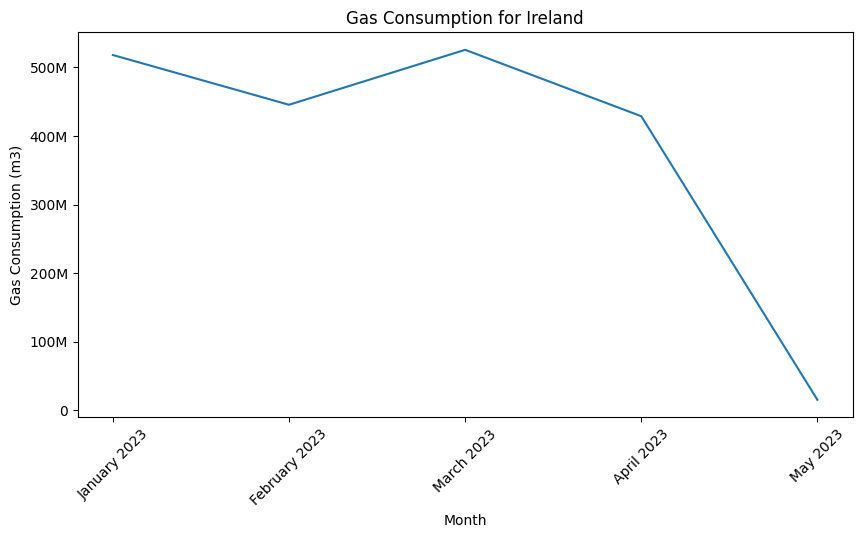

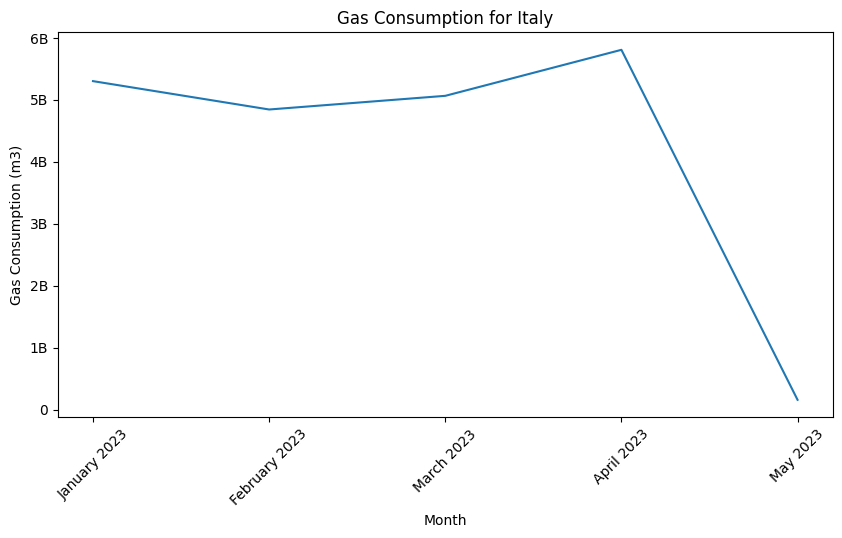

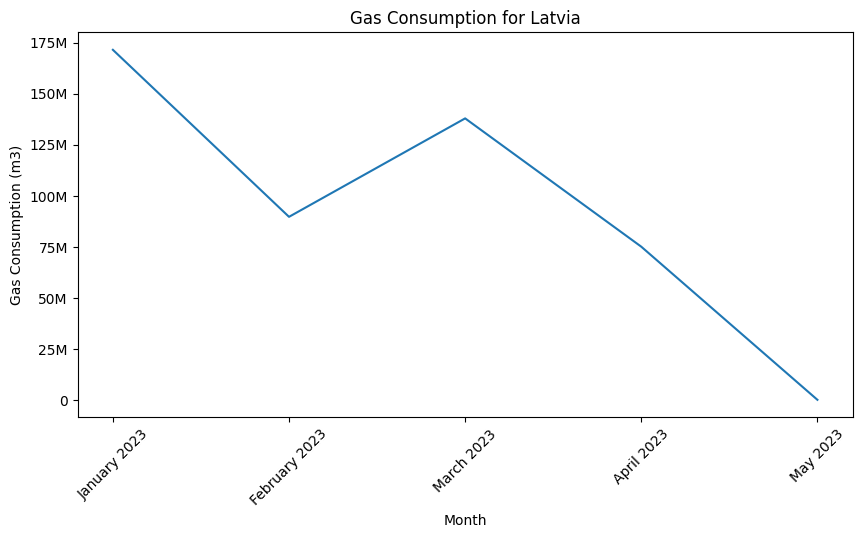

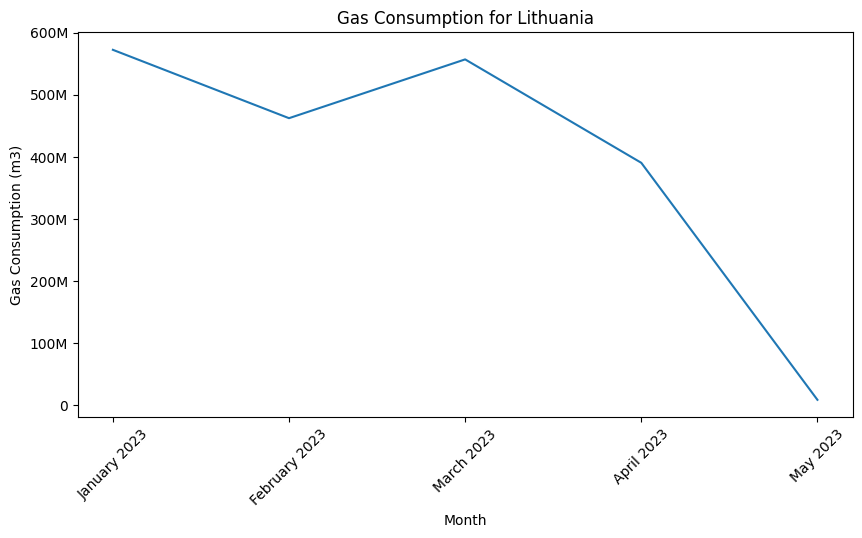

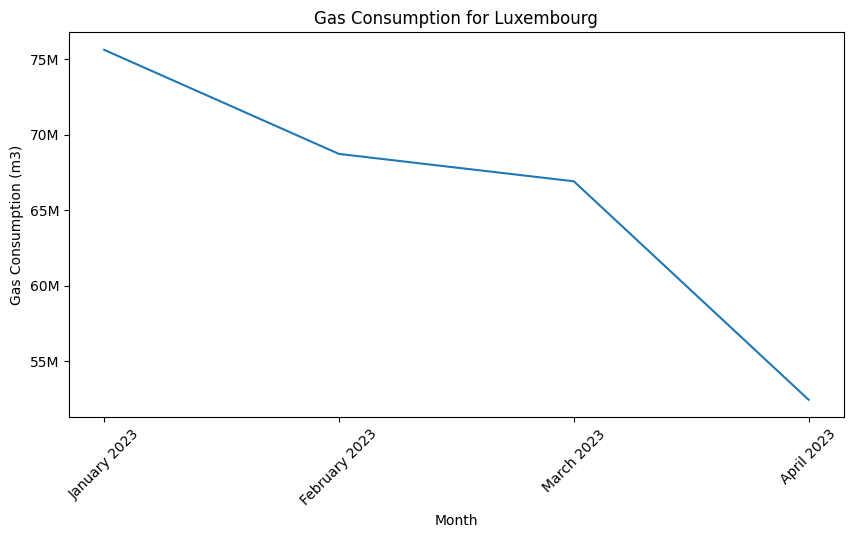

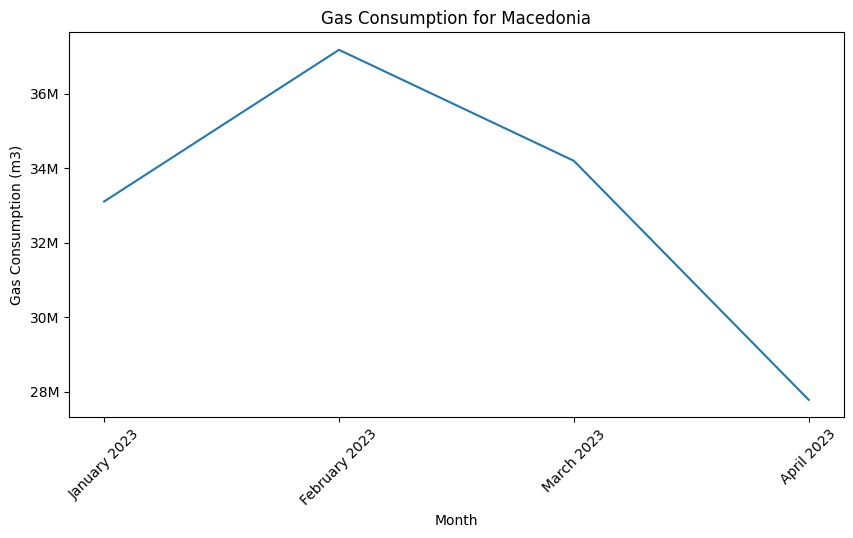

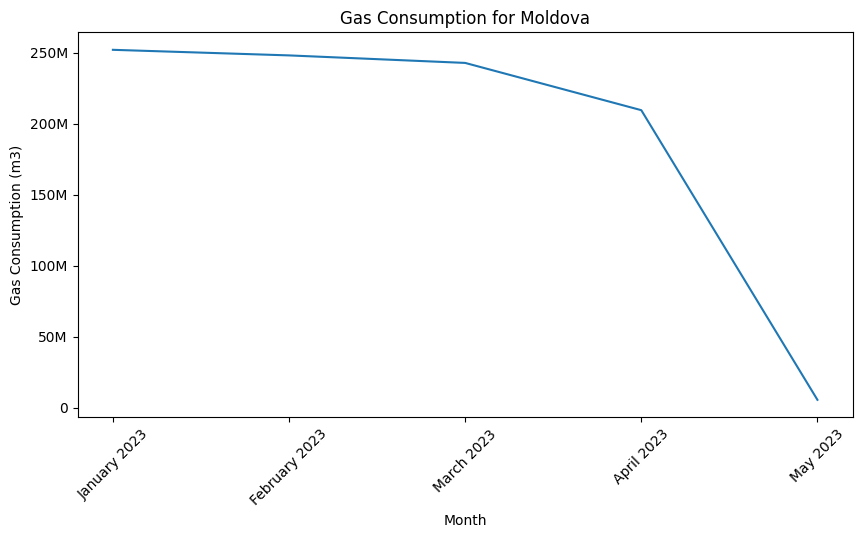

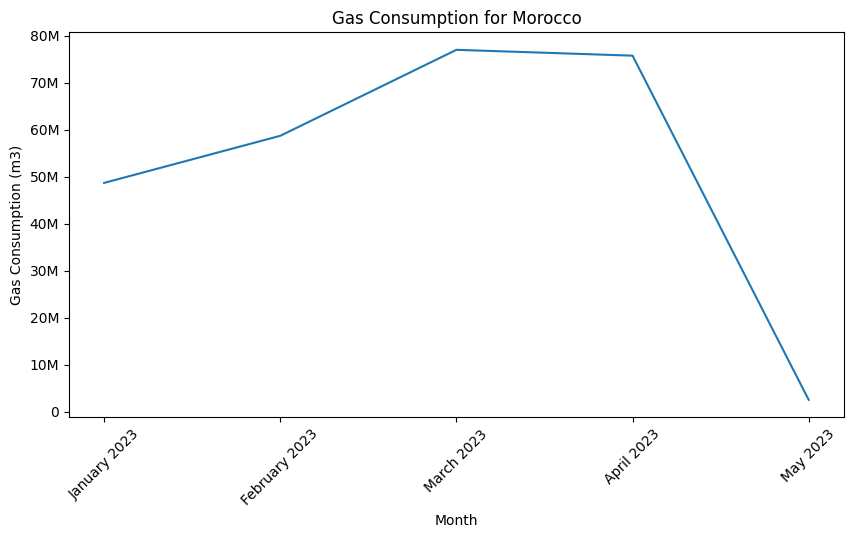

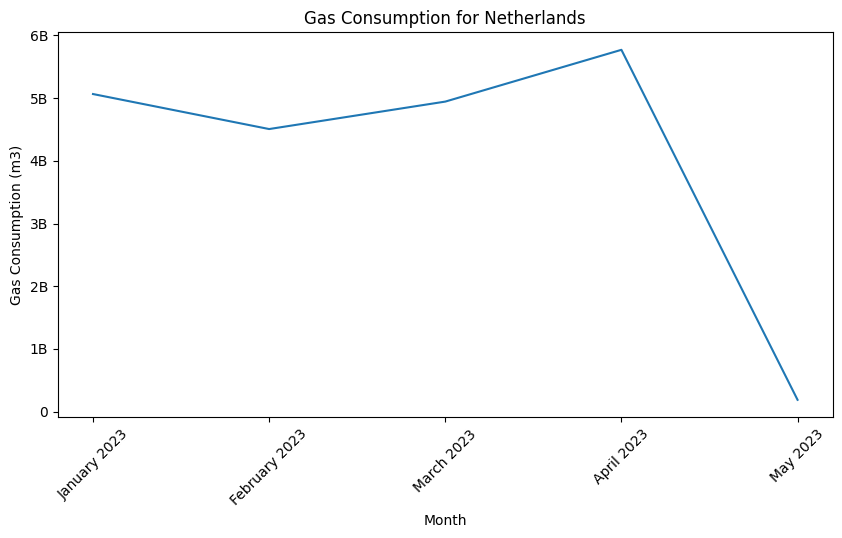

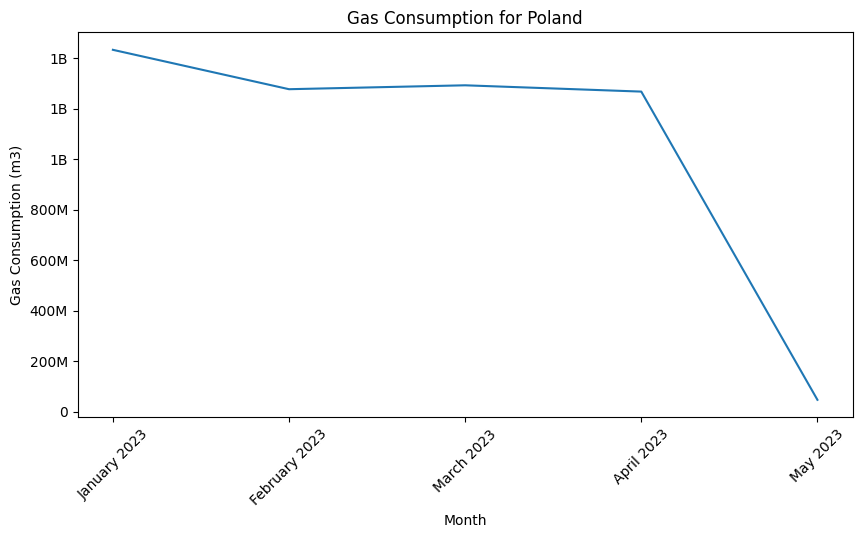

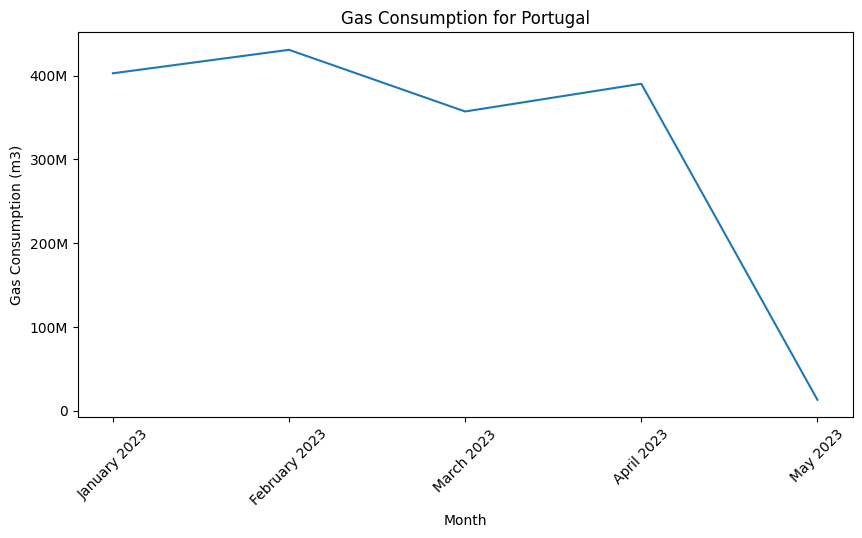

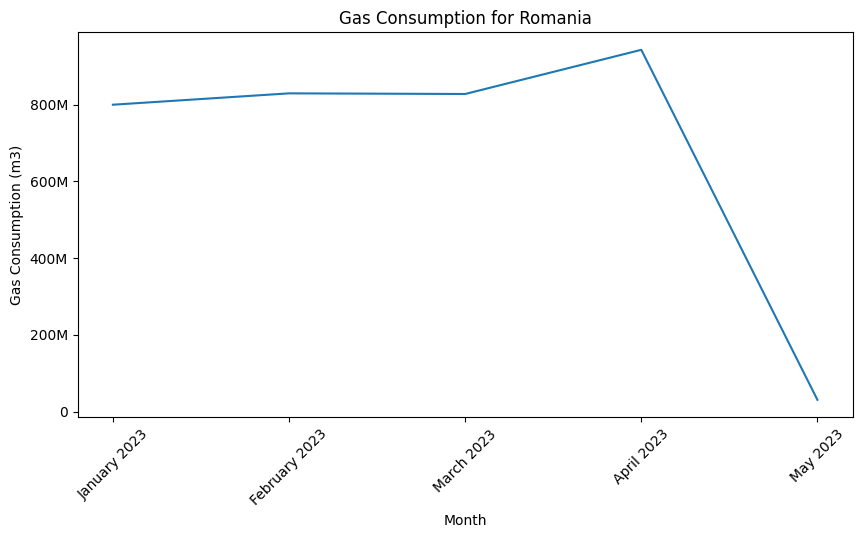

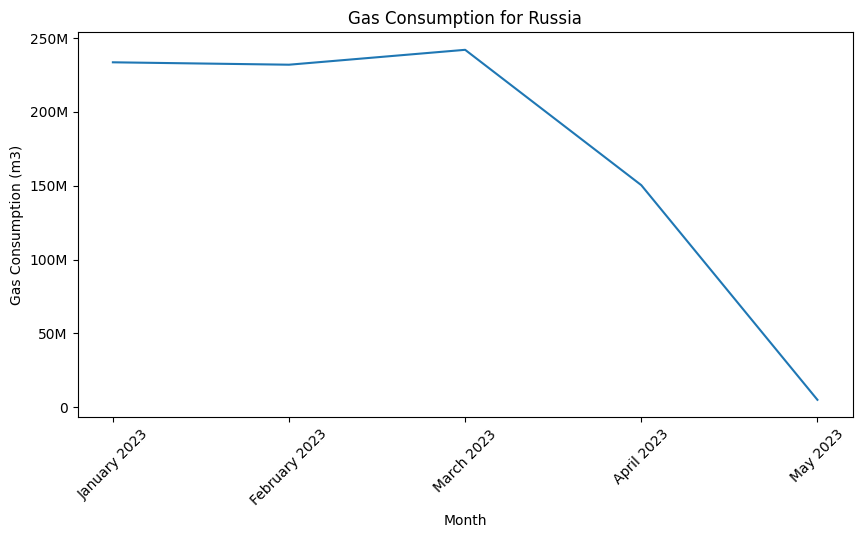

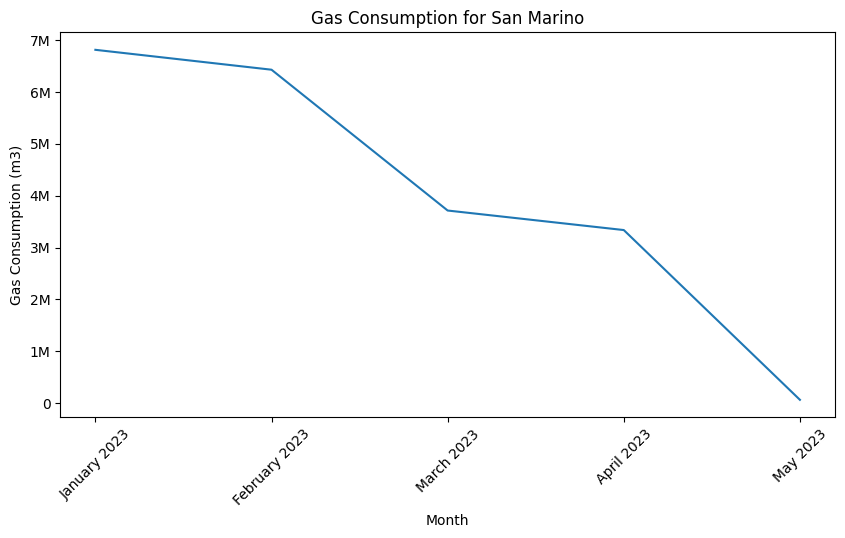

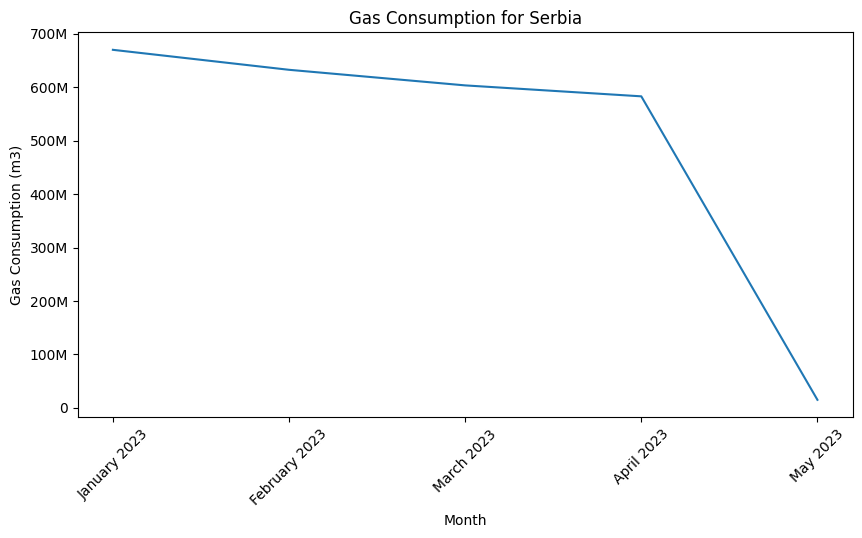

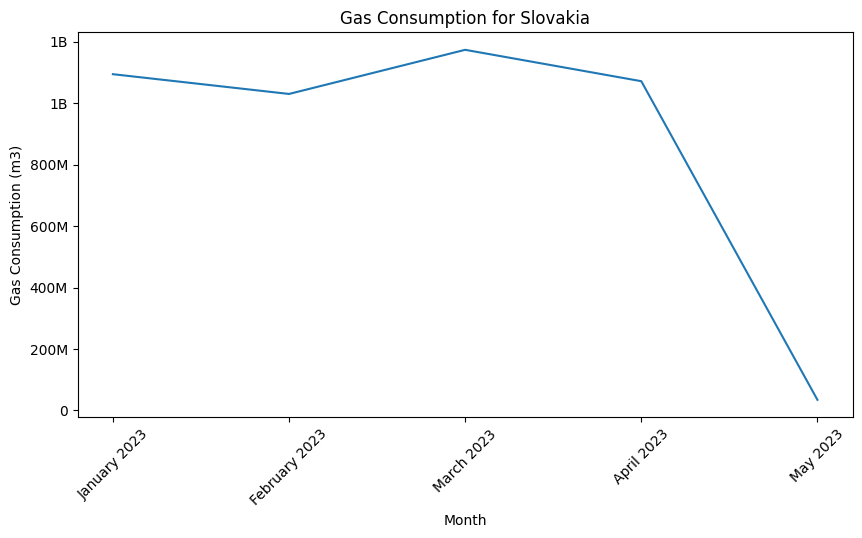

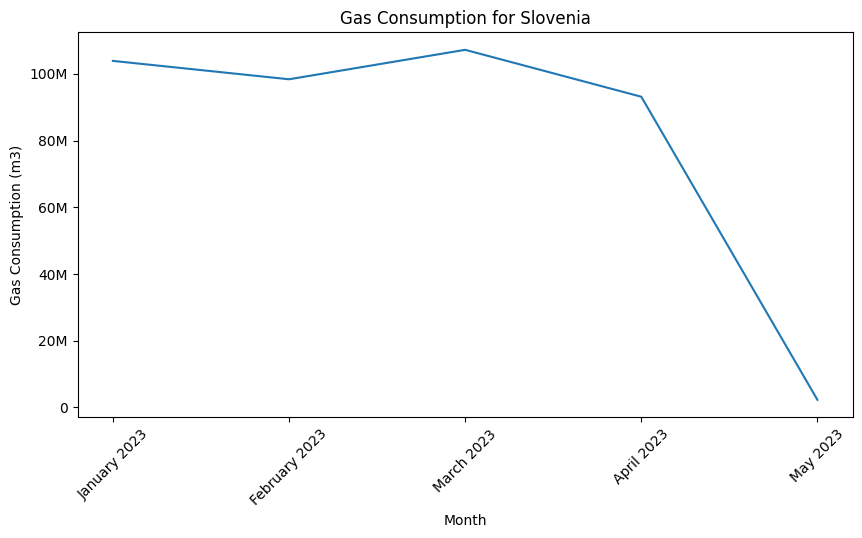

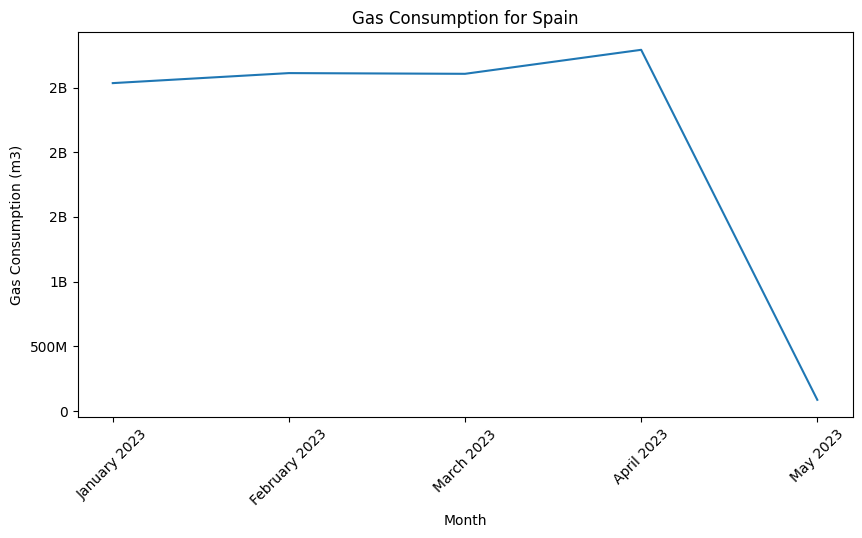

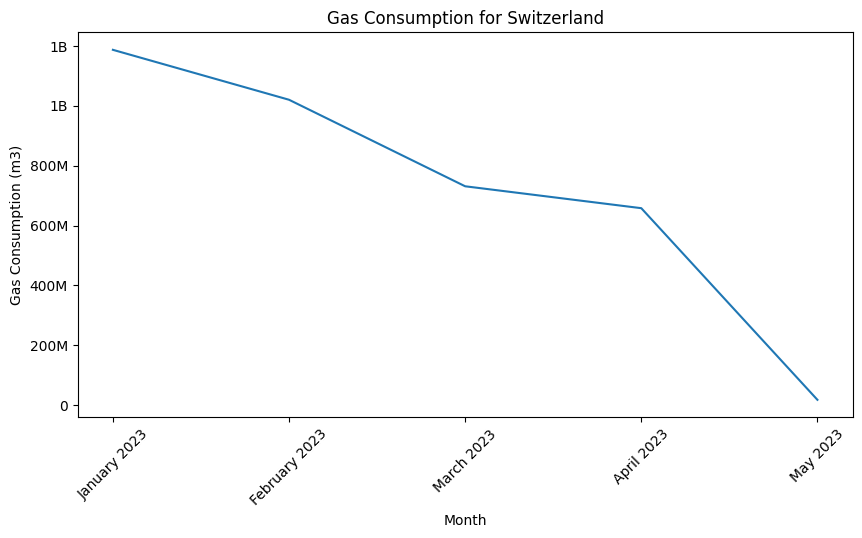

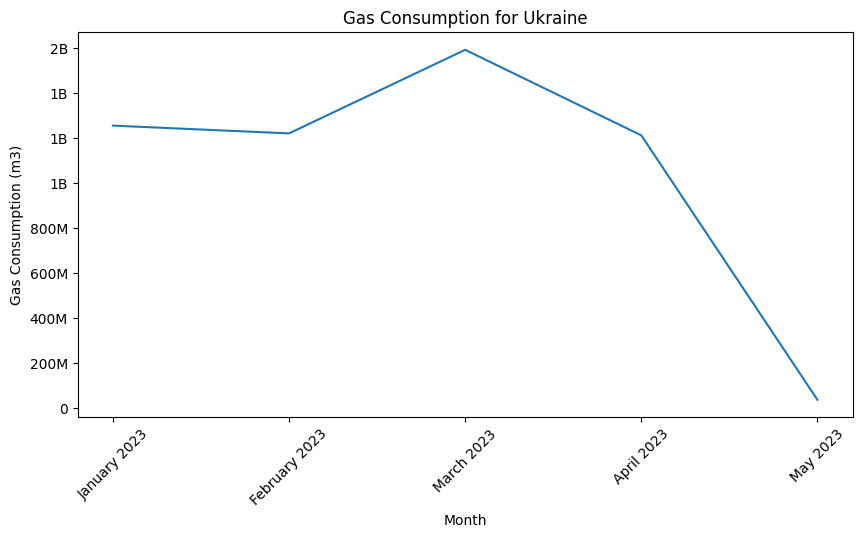

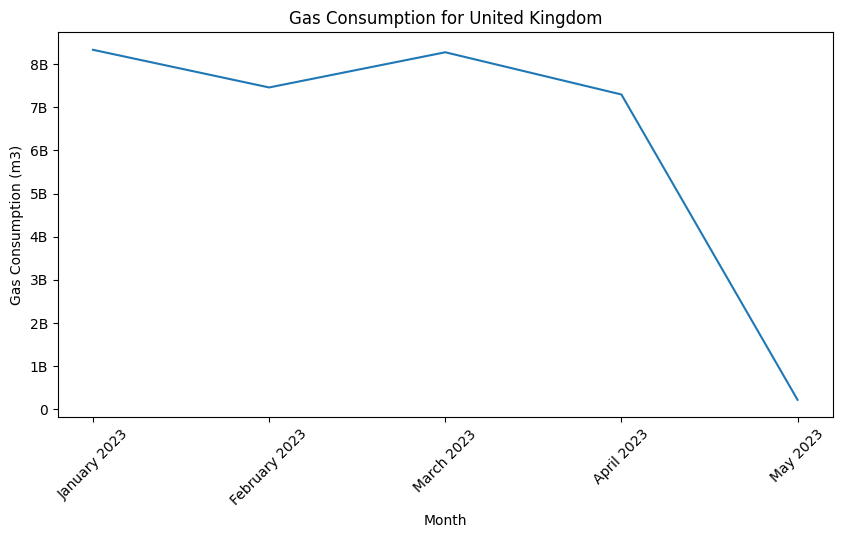

In [150]:
# Get the unique countries in the 'commodity_destination_country' column
countries = grouped_data['commodity_destination_country'].unique()

# Iterate over the countries and plot a line chart for each
for country in countries:
    # Filter the dataframe for the current country
    country_data = grouped_data[grouped_data['commodity_destination_country'] == country]
    
    # Plot the line chart for gas consumption by month for the current country
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['month_year'], country_data['value_m3'])
    plt.title(f'Gas Consumption for {country}')
    plt.xlabel('Month')
    plt.ylabel('Gas Consumption (m3)')
    plt.xticks(rotation=45)

    # Format the y-axis labels to display in the desired format
    def format_func(value, _):
        if value >= 1e9:
            return f'{value/1e9:.0f}B'
        elif value >= 1e6:
            return f'{value/1e6:.0f}M'
        elif value >= 1e3:
            return f'{value/1e3:.0f}K'
        else:
            return f'{value:.0f}'

    # Apply the format_func to format y-axis labels
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

    plt.show()
